### 使用LeNet5实现CIFAR10数据集的分类

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential, Model
from keras.utils import to_categorical

from keras.layers import Dense,Input, Embedding, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten

Using TensorFlow backend.


In [2]:
model = Sequential()

In [4]:
#完成INPUT-C1：添加一个二维卷积层，输入为32x32x3，卷积核大小为5x5，核种类6个，active_function为relu
model.add(Conv2D(6, (5, 5),activation='relu',input_shape=(32, 32,3)))

In [11]:
# 完成C1-S2：2x2下采样层
model.add(MaxPooling2D(pool_size=(2, 2)))

W0511 10:50:39.596483  9276 deprecation_wrapper.py:119] From D:\pythonEV\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
#完成S2-C3：二维卷积，16个内核，5x5的大小
model.add(Conv2D(16, (5, 5), activation='relu'))

In [13]:
# 完成C3-S4：2x2下采样层
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
# 完成S4-C5：先添加平坦层
model.add(Flatten())

In [16]:
#添加全连接层，输出120维，激活函数relu
model.add(Dense(120, activation='relu'))

In [19]:
#完成C5-F6：添加全连接层，84个输出，激活函数relu
model.add(Dense(84, activation='relu'))

In [20]:
#完成F6-OUTPUT：添加全连接层，10个输出，激活函数softmax
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 10)        70        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4016      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)              

D:\pythonEV\anaconda\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [22]:
#设置随机梯度下降SGD优化算法的参数，learning_rate=0.01，epoch=25，decay=learning_rate/epoch，momentum=0.9,nesterov=False
from keras.optimizers import SGD

lrate = 0.01
epoch = 10
decay = lrate/epoch
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

In [23]:
#编译模型，代价函数loss使用categorical_crossentropy，优化算法前面已经定义了，性能的指标使用accuracy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [24]:
#读入数据 & 预处理
import os
import pickle

batch_size = 4

def load_cifar_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
        Y = np.array(Y)
        return list(zip(X, Y))
def load_cifar(ROOT):
    dataset = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        batch = load_cifar_batch(f)
        dataset.append(batch)
    train_X,train_Y = zip(*np.concatenate(dataset))
    train_X=np.array(train_X)
    train_Y=np.array(train_Y)
    del batch
    test_X,test_Y = zip(*load_cifar_batch(os.path.join(ROOT, 'test_batch')))
    test_X=np.array(test_X)
    test_Y=np.array(test_Y)
    return train_X,train_Y,test_X,test_Y

In [26]:
train_X,train_Y,test_X,test_Y = load_cifar('./data')

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


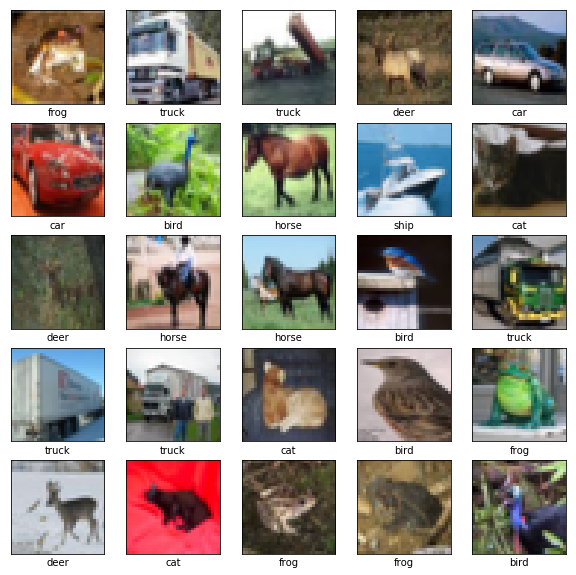

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_Y[i]])
plt.show()

In [28]:
train_X = train_X/255.0
test_X = test_X/255.0

train_Y = to_categorical(train_Y)
test_Y  = to_categorical(test_Y )

In [30]:
# 将数据送入模型，并且设置20%为验证集
result=model.fit(x=train_X, y=train_Y,validation_split=0.2, epochs=10, batch_size=32, verbose=1)

W0511 12:02:51.580359  9276 deprecation_wrapper.py:119] From D:\pythonEV\anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 53s 1ms/step - loss: 2.0049 - accuracy: 0.2527 - val_loss: 1.8557 - val_accuracy: 0.3213
Epoch 2/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.7576 - accuracy: 0.3566 - val_loss: 1.6650 - val_accuracy: 0.4074
Epoch 3/10
40000/40000 [==============================] - 56s 1ms/step - loss: 1.6037 - accuracy: 0.4208 - val_loss: 1.5750 - val_accuracy: 0.4345
Epoch 4/10
40000/40000 [==============================] - 56s 1ms/step - loss: 1.5239 - accuracy: 0.4494 - val_loss: 1.5191 - val_accuracy: 0.4604
Epoch 5/10
40000/40000 [==============================] - 56s 1ms/step - loss: 1.4713 - accuracy: 0.4691 - val_loss: 1.4705 - val_accuracy: 0.4770
Epoch 6/10
40000/40000 [==============================] - 52s 1ms/step - loss: 1.4302 - accuracy: 0.4857 - val_loss: 1.4607 - val_accuracy: 0.4792
Epoch 7/10
40000/40000 [==============================] - 55s 1ms/st

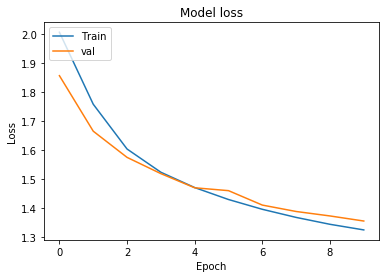

In [35]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [36]:
#模型评估
scores = model.evaluate(test_X, test_Y, verbose=0)
print(model.metrics_names)
print(scores)

['loss', 'accuracy']
[1.3565548280715942, 0.5144000053405762]


In [37]:
#预测结果
predic=model.predict_classes(test_X)
predic[:10]

array([3, 1, 8, 0, 6, 6, 3, 6, 3, 1], dtype=int64)

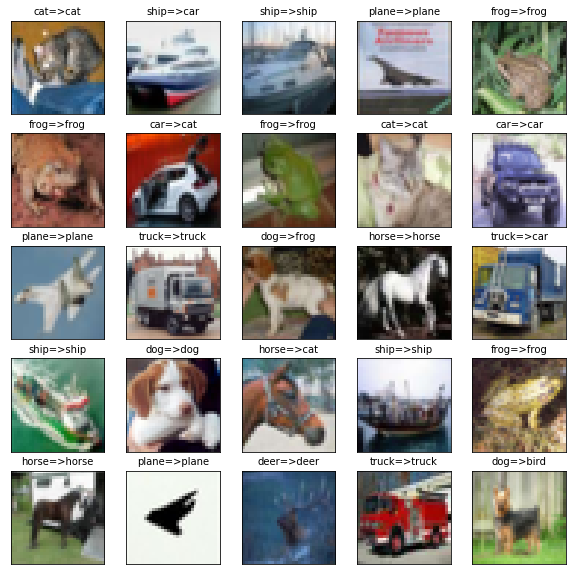

In [39]:
#可视化预测结果
plt.figure(figsize=(10,10))

y_gt=np.argmax(test_Y,axis=1)
for i in range(25):
    ax=plt.subplot(5,5,i+1)
    ax.imshow(test_X[i], cmap=plt.cm.binary)
    title=classes[y_gt[i]]
    title+='=>'+classes[predic[i]]
    ax.set_title(title,fontsize=10) 
    ax.set_xticks([]);ax.set_yticks([]) 
plt.show()

In [41]:
#显示混淆矩阵
import pandas as pd
print(classes)
pd.crosstab(y_gt.reshape(-1),predic,rownames=['label'],colnames=['predict'])

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,589,49,69,25,47,12,17,24,117,51
1,48,613,12,22,12,10,14,16,68,185
2,78,19,381,99,160,82,93,52,20,16
3,19,12,94,376,88,159,145,50,17,40
4,43,13,133,73,445,49,133,79,17,15
5,13,7,113,218,73,386,73,79,15,23
6,7,9,65,101,125,24,631,10,7,21
7,23,8,52,92,104,88,28,557,5,43
8,173,73,26,29,20,13,14,10,565,77
